# AI Comparisons

This notebook is for comparing the different AI's. Three different tests are made:

1. Proving that all three AI's make the same decisions for the same state.
2. AI's with different limits are competing.
3. Comparing the computig time and the node inspections for AlphaBeta and Scout. 

In [79]:
%run Core.ipynb

## 1. AI's make the same decision

The following tests should prove that all three AI's make the same decision when the same state is given. 

The first test checks if the decision for the start state is the same with different limits. 

In [59]:
for i in range(1,6):
    assert Minimax("Mini",i).choose_house(gStartState) == AlphaBeta("Alpha", i).choose_house(gStartState) == Scout("Scout", i).choose_house(gStartState)

All AI's make the same decision, so the test is successful.

The next test checks if the same decision is made for a random state that isn't the start state or a state that results in a finished state.

In [61]:
statetest =  [[1,1,1,1,0,0,15],[2,2,2,2,0,4,17]]
for i in range(1,6):
    assert Minimax("Mini",i).choose_house(statetest) == AlphaBeta("Alpha", i).choose_house(statetest) == Scout("Scout", i).choose_house(statetest)

Again, all three AI's make the same decision.

The following function is used to verify that a game of AlphaBeta and Scout against the Random AI result in the same finished state. The function takes a limit and a seed as parameters and prints out the finished state for both games or raises an error if the finished states are different. 

In [62]:
 def test_ending(limit, seed):

    end_states = set()

    game1 = Kalah_Game([AlphaBeta("AlphaBeta",limit),Random_AI("Rando",seed)],0)
    game1.start()
    end_alpha = to_tuple(game1.state)

    game2 = Kalah_Game([Scout("Scout",limit),Random_AI("Rando",seed)],0)
    game2.start()
    end_scout = to_tuple(game2.state)

    print(set((end_alpha, end_scout)))

    if end_alpha != end_scout:
        raise Exception(f"Exception at seed {seed} with limit {l}")

The function *test_ending* is called for ten different seeds and a limit from one to six. 

In [64]:
for seed in range(10):
    for l in range(1,6):
        test_ending(l, seed)

{((0, 1, 0, 1, 0, 0, 31), (0, 0, 0, 0, 0, 0, 15))}
{((0, 1, 0, 0, 0, 0, 38), (0, 0, 0, 0, 0, 0, 9))}
{((0, 0, 1, 0, 1, 0, 38), (0, 0, 0, 0, 0, 0, 8))}
{((0, 2, 0, 0, 0, 0, 34), (0, 0, 0, 0, 0, 0, 12))}
{((1, 0, 0, 0, 0, 1, 36), (0, 0, 0, 0, 0, 0, 10))}
{((2, 1, 1, 0, 0, 0, 37), (0, 0, 0, 0, 0, 0, 7))}
{((0, 0, 0, 0, 0, 1, 37), (0, 0, 0, 0, 0, 0, 10))}
{((0, 1, 0, 1, 1, 1, 29), (0, 0, 0, 0, 0, 0, 15))}
{((0, 1, 0, 1, 1, 1, 29), (0, 0, 0, 0, 0, 0, 15))}
{((6, 1, 0, 0, 0, 1, 33), (0, 0, 0, 0, 0, 0, 7))}
{((0, 0, 0, 2, 0, 0, 36), (0, 0, 0, 0, 0, 0, 10))}
{((0, 2, 0, 1, 0, 0, 22), (0, 0, 0, 0, 0, 0, 23))}
{((3, 3, 0, 0, 0, 1, 34), (0, 0, 0, 0, 0, 0, 7))}
{((3, 3, 0, 0, 0, 2, 33), (0, 0, 0, 0, 0, 0, 7))}
{((0, 0, 0, 0, 2, 2, 34), (0, 0, 0, 0, 0, 0, 10))}
{((0, 0, 0, 2, 0, 1, 36), (0, 0, 0, 0, 0, 0, 9))}
{((1, 0, 1, 3, 1, 1, 33), (0, 0, 0, 0, 0, 0, 8))}
{((0, 0, 0, 0, 0, 0, 40), (0, 0, 0, 0, 0, 0, 8))}
{((0, 0, 0, 0, 0, 0, 40), (0, 0, 0, 0, 0, 0, 8))}
{((0, 0, 0, 0, 0, 0, 25), (1, 8, 7, 1, 1,

All games ended with the same finished state. That means that the AI's made the same decisions during the game. 

### Conclusion

The tests show that all three AI's make the same decision when the identical state is given. That is the result that was expected. All AI's make equal decisions but the difference lies in the efficiency which is determined by node inspections and computing time. These differences are looked at in the last section. 

## 2. Comparing AI's with different limits

This section studies games between AlphaBeta AI's with different limits and different seeds. The results would be the same for each AI as shown in the previous tests, so it is enough to test one AI only. At first, functions are defined to let two AI's compete for 50 games. 

The function *empty_caches()* empties all existing caches from the Core notebook.

In [41]:
def empty_caches():
    global Cache
    Cache = {}
    global gCache
    gCache = {}
    global Cache_test
    Cache_test = {}
    global Cache_eval
    Cache_eval = {}

### Function: compare_AIs
The function *compare_AIs* takes two AI's and a seed as arguments. Then 50 games are played where each player is beginning 25 times. At the end the result is printed out that shows how many times each AI has won. 

In [42]:
def compare_AIs(AI_1, AI_2, seed=0):
    empty_caches()
    
    rn.seed(seed)

    ai1 = 0
    ai2 = 0

    for _ in range(25):
        game1 = Kalah_Game([AI_1, AI_2],0)
        game1.start()
        won1 = utility(game1.state, 0)
        
        if won1 == 1:
            ai1 += 1
        elif won1 == -1:
            ai2 += 1
        else:
            pass
            
        ############################
        
        game2 = Kalah_Game([AI_2, AI_1],0)
        game2.start()
        won2 = utility(game2.state, 0)

        if won2 == 1:
            ai2 += 1
        elif won2 == -1:
            ai1 += 1
        else:
            pass

    print(str(AI_1.name) + f" won {ai1} times, " + str(AI_2) + f" won {ai2} times and {50-ai1-ai2} games ended as draws.")

### AI's competing

In the following tests two AlphaBeta AI's with different limits and different seeds are competing.

In [70]:
for i in range(4):
    compare_AIs(AlphaBeta("AlphaBeta_4", 4), AlphaBeta("AlphaBeta_3", 3),i)

AlphaBeta_4 won 25 times, AlphaBeta_3 won 25 times and 0 games ended as draws.
AlphaBeta_4 won 25 times, AlphaBeta_3 won 25 times and 0 games ended as draws.
AlphaBeta_4 won 25 times, AlphaBeta_3 won 25 times and 0 games ended as draws.
AlphaBeta_4 won 25 times, AlphaBeta_3 won 25 times and 0 games ended as draws.


In [68]:
for i in range(4):
    compare_AIs(AlphaBeta("AlphaBeta_4", 4), AlphaBeta("AlphaBeta_2", 2),i)

AlphaBeta_4 won 37 times, AlphaBeta_2 won 13 times and 0 games ended as draws.


In [66]:
for i in range(4):
    compare_AIs(AlphaBeta("AlphaBeta_5", 5), AlphaBeta("AlphaBeta_4", 4),i)

AlphaBeta_5 won 33 times, AlphaBeta_4 won 8 times and 9 games ended as draws.


In [72]:
for i in range(4):
    compare_AIs(AlphaBeta("AlphaBeta_5", 5), AlphaBeta("AlphaBeta_3", 3),i)

AlphaBeta_5 won 39 times, AlphaBeta_3 won 6 times and 5 games ended as draws.
AlphaBeta_5 won 34 times, AlphaBeta_3 won 13 times and 3 games ended as draws.
AlphaBeta_5 won 36 times, AlphaBeta_3 won 11 times and 3 games ended as draws.
AlphaBeta_5 won 41 times, AlphaBeta_3 won 6 times and 3 games ended as draws.


In the first test the result is very balanced. The second test with a limit difference of two shows that the AI with the higher limit wins more often. In the last tests with an odd number as higher limit the AI with the higher limit wins more often. That shows that an AI with a limit difference of two or more wins significantly more often. With a limit difference of one the AI with a higher limit wins more often when the higher limit is an odd number. The reason for that outcome will be discussed in the conclusion. 

### Conclusion

The tests show the following outcome when two AI's compete with different limits:
- An AI with the higher limit wins more often when the limit is higher by a minimum of two.
- The games between two AI's with a limit difference of one are very balanced when the higher limit is an even number. 
- An AI with a higher limit by one wins more often when the limit is an odd number. 

With a limit difference of one the question if the higer limit is an even or an odd number has a big influence. The reason for that is that with a recursion depth that is set to an even number the last state that is considered is a state where the currently choosing player has a turn. Then the decisions can be slightly worse than the decisions with a limit that checks a final state where the opponent has a turn. That would be the cause for odd limits. A fair assumption as to why this occurs is that a limit with an even number only looks at the maximizing player for that last state and does not consider what kind of opportunities this gives the opponent. Odd limits always consider the opponent in their last checked state which causes a better choice in general. 

## 3. Time and Node Inspections comparison: AlphaBeta, Scout

In this section we are comparing the efficencies of the two AI's AlphaBeta and Scout:

- computation time for AlphaBeta AI and Scout AI
- node inspections for AlphaBeta AI and Scout AI

All of the implemented AI's use memoization. Memoization is a technique to speed up function calls of a certain complex function, by storing past inputs and corresponding outputs in a dictionary. If an input to the function was once recieved before, the execution of the actual function can be skipped and instead the output stored in the dictionary will be returned. This is mainly useful for functions that take longer to compute than it takes to access a value in a dictionary.

The function *test_with_limit* receives a Player class and a limit and then plays five games with two players of this Player class which each are given the provided limit. By playing five games with different seeds, variations due to random choices of the AIs are evened.

In [80]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def test_with_limit(PlayerClass, limit):
    global gCounts
    gCounts = 0
    time = datetime.now()
    for seed in range(5):
        empty_caches()
        Kalah_Game([PlayerClass("Player_1",limit,seed),PlayerClass("Player_2",limit,seed)],0).start()
    time_diff = datetime.now() - time
    time_diff = float(time_diff.total_seconds())
    return time_diff

The following function *test_AIs* tests the three AIs one after another with different limits and saves the calculation times and node inspection counts to lists to illustrate them in diagrams afterwards.

In [83]:
limits = [1,2,3,4,5,6,7]

In [84]:
def test_AIs():
    global limits
    times = [[],[]]
    counts = [[],[]]

    for limit in limits:
        times[0].append(test_with_limit(AlphaBeta, limit))
        counts[0].append(gCounts)

    for limit in limits:
        times[1].append(test_with_limit(Scout, limit))
        counts[1].append(gCounts)
    
    return times, counts

The function *draw_plots()* displays the calculated time and node inspection count values in two diagrams make them comparable.

In [85]:
def draw_plots(times, counts):
    global limits

    plt.title('Calculation time for 5 games of two identical player algorithms')
    plt.xlabel('Limit depth')
    plt.ylabel('Time in seconds')

    plt.plot(limits, times[0], label="AlphaBeta")
    plt.plot(limits, times[1], label="Scout")
    plt.xticks(limits)

    plt.legend(loc='upper left', frameon=True)

    # Diagramm anzeigen:
    plt.show()

    plt.title('Node Inspections for 5 games of two identical player algorithms')
    plt.xlabel('Limit depth')
    plt.ylabel('Node Inspections')

    plt.plot(limits, counts[0], label="AlphaBeta")
    plt.plot(limits, counts[1], label="Scout")
    plt.xticks(limits)

    plt.legend(loc='upper left', frameon=True)

    # Diagramm anzeigen:
    plt.show()

### Comparison

In [77]:
times, counts = test_AIs()

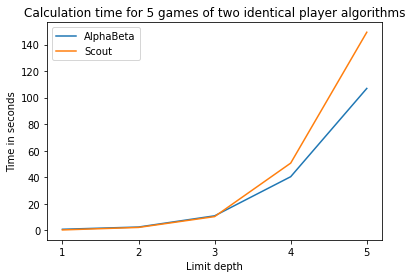

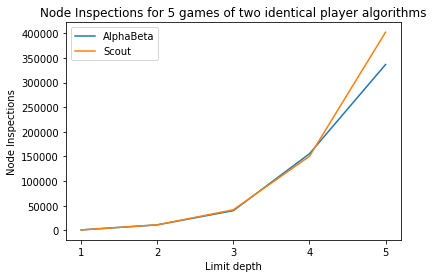

In [78]:
draw_plots(times, counts)

### Conclusion

**TODO!**

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b91c3ea7-d814-439b-837a-72fdc90697b1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>